# python元编程
所谓元编程就是编写直接生成或操纵程序的程序，例如C++模板给C++语言提供了元编程的能力，模板使C++ 编程变得异常灵活，能实现很多高级动态语言才有的特性。元编程在一定程度上弥补了python在OOP方面的不足，例如抽象类（abc.abstractmethod和ABCMeta元类配合）、final类（元类来限制继承）、@staticmethod、@classmethod等。在python中，元编程体现在以下几个方面：
    
1、一种以修饰（或修改）已有代码为主 - 装饰器（函数装饰器，类装饰器），见[python装饰器](python装饰器.ipynb)
 
2、一种以创建（或限制）新代码为主 - 元类，本文主要介绍这种元编程
> 方式一：使用type(name, bases, dict)直接创建type对象，该对象就是新创建的类；

> 方式二：定义元类type的子类，并赋值了\__metaclass\__

## 方式一

In [1]:
def __init__(self, x):
    self.x = x

def printX(self):
    print self.x

ClassTest = type('Test', (object,), {'__init__': __init__, 'printX': printX})
print vars(ClassTest)

#等价于

class Test(object):
    def __init__(self, x):
        self.x = x

    def printX(self):
        print self.x
        
print vars(Test)

{'__module__': '__main__', 'printX': <function printX at 0x0000000003BB2F98>, '__dict__': <attribute '__dict__' of 'Test' objects>, '__weakref__': <attribute '__weakref__' of 'Test' objects>, '__doc__': None, '__init__': <function __init__ at 0x0000000003BB2E48>}
{'__module__': '__main__', 'printX': <function printX at 0x0000000003C24048>, '__dict__': <attribute '__dict__' of 'Test' objects>, '__weakref__': <attribute '__weakref__' of 'Test' objects>, '__doc__': None, '__init__': <function __init__ at 0x0000000003BB2EB8>}


## 方式二

In [2]:
#①创建元类type的子类
class MetaClass(type):

#__new__和__init__选择其一

    def __new__(mcl, name, bases, nmspc):
        print 'mcl:', mcl
        print 'Class Name:', name
        print 'Bases:', bases
        print 'Class Attributes', nmspc
        return type.__new__(mcl, name, bases, nmspc)
    
#     def __init__(mcl, name, bases, nmspc):
#         type.__init__(mcl, name, bases, nmspc)
#         print 'mcl:', mcl
#         print 'Class Name:', name
#         print 'Bases:', bases
#         print 'Class Attributes', nmspc

class Test(object):

    __metaclass__ = MetaClass   #②把元类的子类赋值给__metaclass__，并以创建对象__metaclass__()

    def __init__(self):
        pass

    def method(self):
        pass

    classAttribute = 'Something'

print vars(Test)
print Test.__class__
print Test.__name__
print Test.__base__

mcl: <class '__main__.MetaClass'>
Class Name: Test
Bases: (<type 'object'>,)
Class Attributes {'__module__': '__main__', '__metaclass__': <class '__main__.MetaClass'>, 'method': <function method at 0x0000000003C24198>, '__init__': <function __init__ at 0x0000000003C24278>, 'classAttribute': 'Something'}
{'__module__': '__main__', '__metaclass__': <class '__main__.MetaClass'>, '__doc__': None, 'classAttribute': 'Something', '__dict__': <attribute '__dict__' of 'Test' objects>, '__weakref__': <attribute '__weakref__' of 'Test' objects>, 'method': <function method at 0x0000000003C24198>, '__init__': <function __init__ at 0x0000000003C24278>}
<class '__main__.MetaClass'>
Test
<type 'object'>


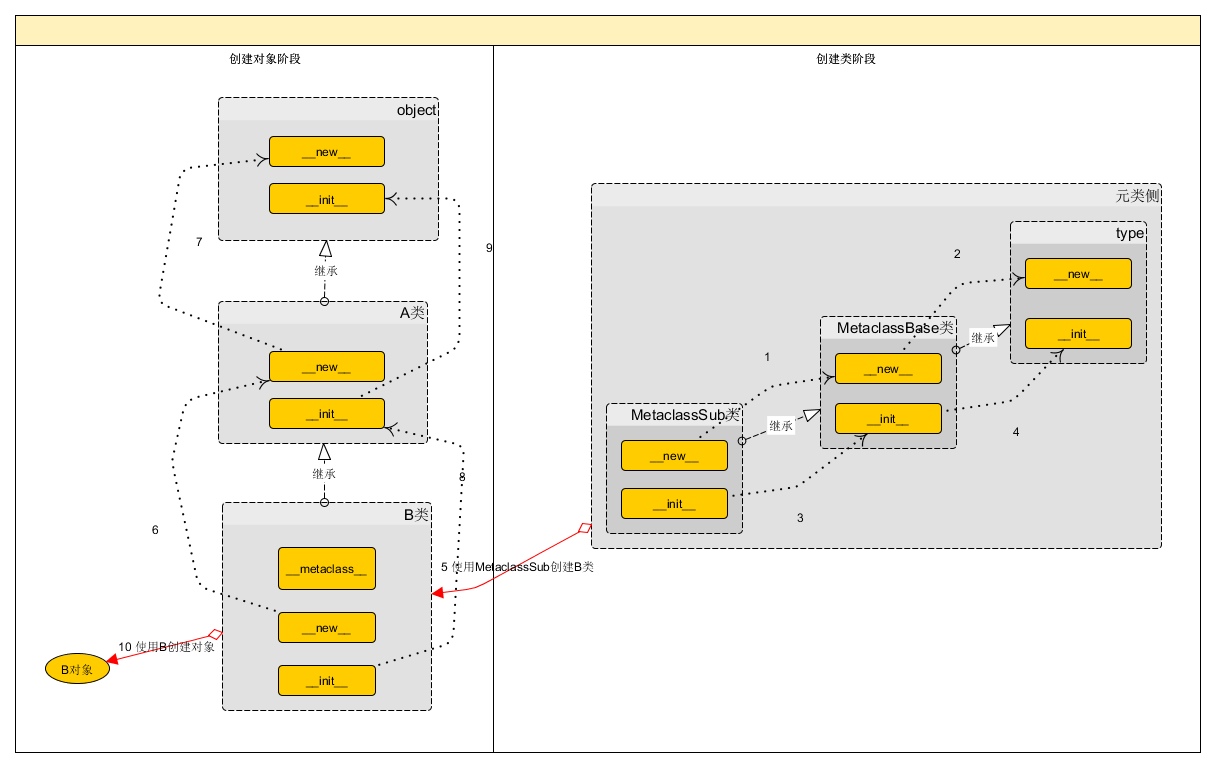

In [3]:
from IPython.display import Image
Image(filename=u"..\images\python元编程.png")

## python3简化方式
class A(object, metaclass = Metaclass):
    
    ...

## 元编程应用

## 其他

In [4]:
class A(object):
    pass
class B(A):
    pass

print isinstance(B(),A)
print isinstance(A(),A)
print issubclass(B,A)
print issubclass(B,object)
print type(B)
print B.__class__
print B.__base__
print B.__name__
print type(A)
print A.__class__
print A.__base__
print A.__name__

True
True
True
True
<type 'type'>
<type 'type'>
<class '__main__.A'>
B
<type 'type'>
<type 'type'>
<type 'object'>
A
